In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
import logging
from tensorflow.keras.utils import to_categorical
tf.get_logger().setLevel(logging.ERROR)

cifar_dataset = keras.datasets.cifar10
(train_images, train_labels), (test_images,
    test_labels) = cifar_dataset.load_data()

train_images_norm = np.zeros(train_images.shape)
test_images_norm = np.zeros(test_images.shape)

/Users/maxb/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [2]:
channel_means = np.mean(train_images,axis=(0,1,2))
channel_stddevs = np.std(train_images,axis=(0,1,2))
#train_images = np.apply_over_axes(lambda px: ((px - channel_means) / channel_stddevs),train_images,(0,1,2))
#test_images = np.apply_over_axes(lambda px: ((px - channel_means) / channel_stddevs),test_images,(0,1,2))

for px_pos in range(3):
    train_images_norm[:,:,:,px_pos] = (train_images[:,:,:,px_pos] - channel_means[px_pos]) / channel_stddevs[px_pos]
    test_images_norm[:,:,:,px_pos] = (test_images[:,:,:,px_pos] - channel_means[px_pos]) / channel_stddevs[px_pos]

# Change labels to one-hot.
train_labels = to_categorical(train_labels,
                              num_classes=10)
test_labels = to_categorical(test_labels,
                             num_classes=10)

In [10]:
model = keras.Sequential([
    keras.layers.Conv2D(32,
                        8, 
                        activation='tanh',
                        kernel_initializer='random_normal',
                        bias_initializer='zeros'),
    keras.layers.Conv2D(10,8,
                       activation='tanh',
                       kernel_initializer='random_normal',
                       bias_initializer='zeros'),
    keras.layers.Flatten(),
    keras.layers.Dense(10, activation='softmax',
                       kernel_initializer='random_normal',
                       bias_initializer='zeros')])

model.compile(loss='categorical_crossentropy',
              optimizer = 'adam',
              metrics =['accuracy'])

history = model.fit(train_images_norm, train_labels,
                    validation_data=(test_images_norm, test_labels),
                    epochs=3, batch_size=1,
                    verbose=3, shuffle=True)


Epoch 1/3
Epoch 2/3
Epoch 3/3


In [17]:
np.argmax(model.predict(test_images_norm[:10]),1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step


array([6, 9, 9, 3, 2, 6, 5, 4, 0, 9])

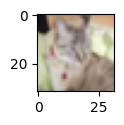

In [26]:
plt.figure(figsize=(1, 1))
plt.imshow(test_images[8])
plt.show()

In [27]:
test_labels[8]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.])